# Ejercicio 2

2. Consideremos la función $𝑓 : R → R$ dada por $𝑓 (𝑥) = 2𝑥 −1$. Sean $𝑋 ∼ U(0,1),𝑍 ∼ N(0,.25)$ e $𝑌 := 𝑓 (𝑋) +𝑍$.\n",
    " \n",
    "    (a) Fijemos 𝑛 = 100. Tomar muestras $𝑥1,...,𝑥𝑛$ de 𝑋 y $𝜀1,...,𝜀𝑛$ de 𝑍 y calcular $𝑦𝑖 = 𝑓 (𝑥𝑖) +𝑧𝑖$, con 1 ≤ 𝑖 ≤ 𝑛. Realizar un ajuste lineal de la forma $𝑌 = 𝑋𝛽1 + 𝛽0 + 𝜖$ a partir de los samples $(𝑥1,𝑦1), . . ., (𝑥𝑛,𝑦𝑛)$ generados. Hacer un diagrama de dispersión con los samples y la estimación del modelo de regresión lineal.  \n",
    "    Lo que cambia con el 1.b es que no tenemos definido 𝜀\n",
    "    \n"

In [9]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [10]:
# Funcion
# 1 Defino la  𝑓 (𝑥) = 2𝑥 −1.
def f(x):
    return 2*x - 1

Coeficiente beta_1 estimado: 1.9841563729648217
Intercepto beta_0 estimado: -0.9884273745801329


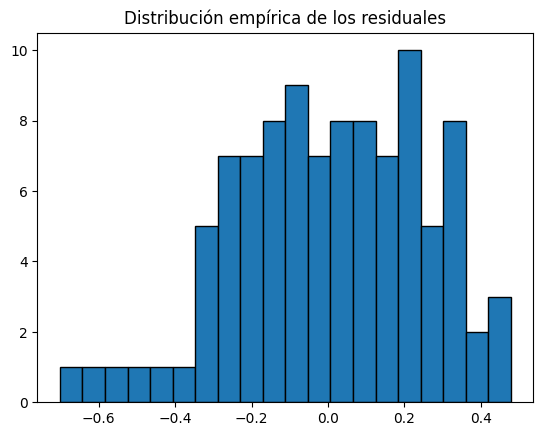

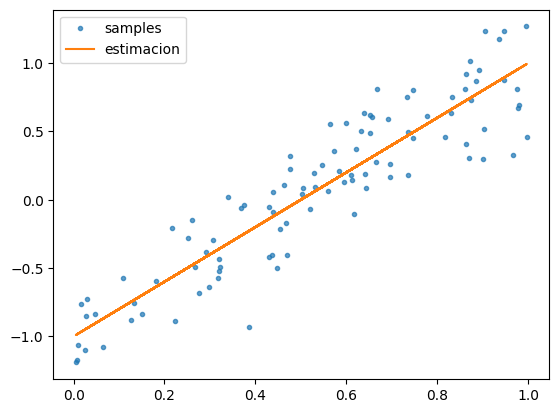

In [7]:
# Repetir desde n = 1000

# 2 Genero los samples y su valor
n = 100
samples_x = np.random.uniform(0, 1, n)
samples_error = np.random.normal(0, 0.25, n)
samples_y = f(samples_x) + samples_error

# 3 Calculo de los coeficientes
b1 = np.sum((samples_x - np.mean(samples_x))*(samples_y - np.mean(samples_y))) / np.sum((samples_x - np.mean(samples_x))**2)

b0 = b0 = np.mean(samples_y) - b1 * np.mean(samples_x)
 
print(f"Coeficiente beta_1 estimado: {b1}")
print(f"Intercepto beta_0 estimado: {b0}")

# 4 Graficar los samples y la estimación

# Graficar el histograma de los residuales
plt.hist(samples_error, bins=20, edgecolor='black')
plt.title('Distribución empírica de los residuales')
plt.show()

# Plotear samples y estimación
fig, ax = plt.subplots()
ax.plot(samples_x, samples_y, '.', alpha=.7, label='samples')
ax.plot(samples_x, 2*samples_x -1 , label='estimacion')
plt.legend()
plt.show()

(b) "
Repetir el paso anterior 𝑚 = 1000 veces para obtener 𝑚 pares de coeficientes $ \\hat{\\beta_0}$ y $\\hat{\\beta_1}$, es decir, 𝑚 samples de $ \\hat{\\beta_0}$ y 𝑚 samples de $ \\hat{\\beta_1}$. Visualizar la distribución de cada $ \\hat{\\beta_j}$ haciendo un histograma; visualizar la distribución conjunta haciendo un diagrama de dispersión con todas las estimaciones. Además, graficar todas las rectas de regresión estimadas."


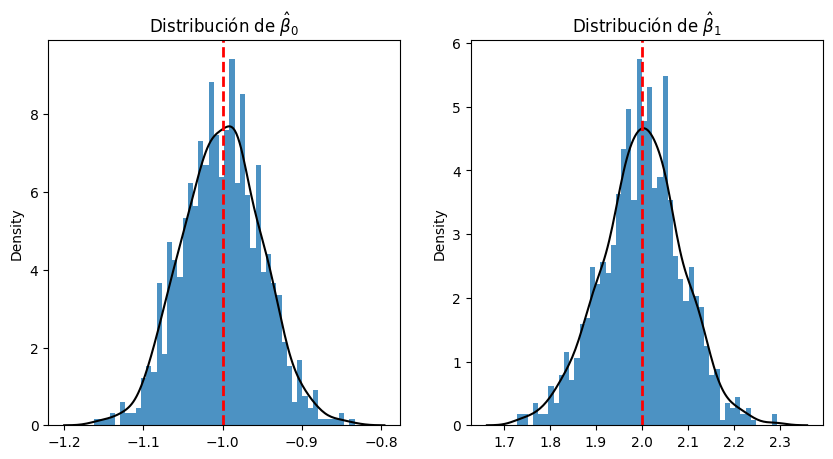

C:\Users\lucas\AppData\Local\Temp\ipykernel_12188\2230874307.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


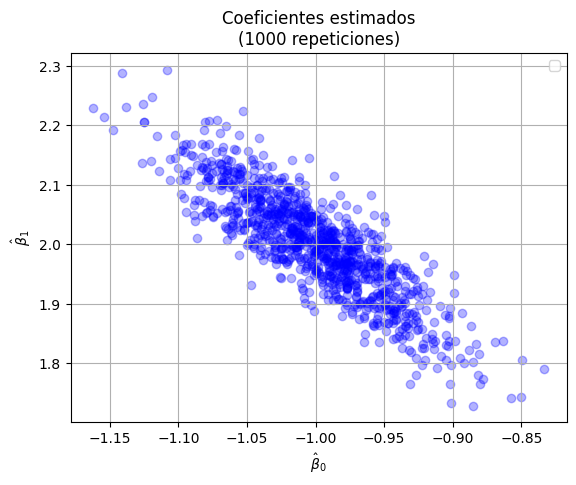

In [13]:
# Repetir desde n = 1000
# Voy a evaluar el comportamiento del estimador de los coeficientes beta_0 y beta_1 cuando n = 1000.
n = 1000
b1, b0 = [], [] 

# 2 Evaluo b1 y b0 en 1000 casos de 100 samples
for e in range(n):
    # 3 Genero 100 samples y sus valor
    s = 100
    samples_x = np.random.uniform(0, 1, s)
    samples_error = np.random.normal(0, 0.25, s)
    samples_y = f(samples_x) + samples_error

    # 3 Calculo de los coeficientes
    b1_toAdd = np.sum((samples_x - np.mean(samples_x))*(samples_y - np.mean(samples_y))) / np.sum((samples_x - np.mean(samples_x))**2)

    b0_toAdd = np.mean(samples_y) - b1_toAdd * np.mean(samples_x)
    
    b1.append(b1_toAdd)
    b0.append(b0_toAdd)

# 4 Analizo los resultados
bins = 50

fig, axs  = plt.subplots(1,2, figsize=(10,5))

axs[0].hist(b0, density=True, alpha=.8, bins = bins)
sns.kdeplot(b0, ax=axs[0], color='k')
axs[0].axvline(x=-1, color='r', linestyle='--', linewidth=2)
axs[0].set_title('Distribución de $\\hat\\beta_0$')

axs[1].hist(b1, density=True, alpha=.8, bins = bins)
sns.kdeplot(b1, ax=axs[1], color='k')
axs[1].axvline(x=2, color='r', linestyle='--', linewidth=2)
axs[1].set_title('Distribución de $\\hat\\beta_1$')
plt.show()

#visualizar la distribución conjunta de los coeficientes b0 y b1
plt.scatter(b0, b1, color='blue', alpha=.3 )
plt.title('Distribución conjunta de b0 y b1')
plt.xlabel('$\\hat{\\beta}_0$')
plt.ylabel('$\\hat{\\beta}_1$')
plt.title(f'Coeficientes estimados\n({1000} repeticiones)')
plt.legend()
plt.grid(True)
plt.show()


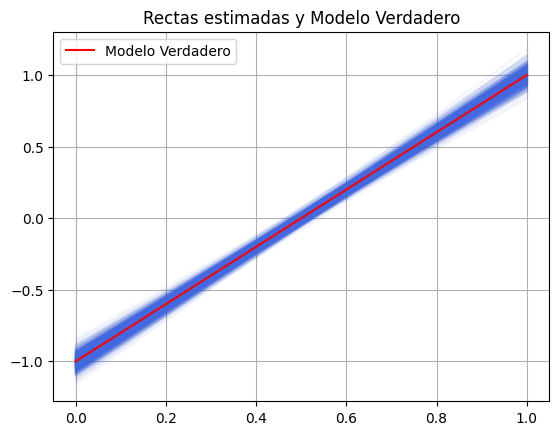

In [14]:
# 4.2 Real vs estimado
x_vals = np.linspace(0, 1, 100)
for i in range(1000):
    plt.plot(x_vals, b0[i] + b1[i] * x_vals, color='royalblue', alpha=0.03)

# Graficar el modelo verdadero
plt.plot(x_vals, -1 + 2 * x_vals, color='red', label='Modelo Verdadero')

# Personalizar el gráfico
plt.title('Rectas estimadas y Modelo Verdadero')
plt.legend()
plt.grid(True)
plt.show()

c) Repetir el paso anterior para 𝑚 = 100 desde 𝑛 = 10 hasta 𝑛 = 1000. Graficar la media y la varianza de cada coeficiente 
 en función de 𝑛.
Acá copie el codigo del profe para tenerlo mano y poder modificarlo depende lo que pidan